In [1]:
!pip install pandas
!pip install scipy

In [2]:
import pandas as pd
from scipy.io import arff
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [3]:
arff_file = arff.loadarff('/kaggle/input/turings-again/KDDTrain.arff')

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
arff_file_21 = arff.loadarff('/kaggle/input/turings-again/KDDTest.arff')

In [6]:
arff_actual_file_21 = arff.loadarff('/kaggle/input/turings-again/KDDTest-21.arff')

In [7]:
df_21 = pd.DataFrame(arff_file_21[0])

In [8]:
df_actual_21 = pd.DataFrame(arff_actual_file_21[0])

In [9]:
df_21

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,b'tcp',b'smtp',b'SF',794.0,333.0,b'0',0.0,0.0,0.0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22540,0.0,b'tcp',b'http',b'SF',317.0,938.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22541,0.0,b'tcp',b'http',b'SF',54540.0,8314.0,b'0',0.0,0.0,2.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,b'anomaly'
22542,0.0,b'udp',b'domain_u',b'SF',42.0,42.0,b'0',0.0,0.0,0.0,...,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,b'normal'


In [10]:
df_actual_21

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,13.0,b'tcp',b'telnet',b'SF',118.0,2425.0,b'0',0.0,0.0,0.0,...,10.0,0.38,0.12,0.04,0.00,0.00,0.00,0.12,0.30,b'anomaly'
1,0.0,b'udp',b'private',b'SF',44.0,0.0,b'0',0.0,0.0,0.0,...,254.0,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,b'anomaly'
2,0.0,b'tcp',b'telnet',b'S3',0.0,44.0,b'0',0.0,0.0,0.0,...,79.0,0.31,0.61,0.00,0.00,0.21,0.68,0.60,0.00,b'anomaly'
3,0.0,b'udp',b'private',b'SF',53.0,55.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00,b'normal'
4,0.0,b'tcp',b'private',b'SH',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.06,1.00,1.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0.0,b'udp',b'domain_u',b'SF',43.0,43.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,b'normal'
11846,0.0,b'tcp',b'http',b'SF',336.0,285.0,b'0',0.0,0.0,0.0,...,234.0,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00,b'normal'
11847,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,...,96.0,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,b'anomaly'
11848,0.0,b'tcp',b'sunrpc',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,52.0,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,b'anomaly'


In [11]:
df2 = arff.loadarff('/kaggle/input/turings-again/KDDTrain.arff')

In [12]:
df2 = pd.DataFrame(df2[0])

In [13]:
df2.sample(n=10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
31761,0.0,b'tcp',b'ftp',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,13.0,0.05,0.07,0.00,0.00,1.00,1.00,0.0,0.0,b'anomaly'
94399,0.0,b'tcp',b'http',b'SF',235.0,4288.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.04,0.07,0.00,0.00,0.0,0.0,b'normal'
56538,0.0,b'tcp',b'http',b'SF',191.0,887.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,b'normal'
52159,3.0,b'tcp',b'smtp',b'S3',1378.0,327.0,b'0',0.0,0.0,0.0,...,55.0,0.57,0.05,0.01,0.00,0.01,0.02,0.0,0.0,b'normal'
20195,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,5.0,0.02,0.11,0.00,0.00,1.00,1.00,0.0,0.0,b'anomaly'
121083,0.0,b'udp',b'domain_u',b'SF',46.0,73.0,b'0',0.0,0.0,0.0,...,254.0,1.00,0.01,0.00,0.00,0.00,0.00,0.0,0.0,b'normal'
94923,0.0,b'tcp',b'finger',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,74.0,0.29,0.02,0.00,0.00,1.00,1.00,0.0,0.0,b'anomaly'
48920,0.0,b'tcp',b'ftp_data',b'SF',11.0,0.0,b'0',0.0,0.0,0.0,...,42.0,0.16,0.51,0.16,0.00,0.51,0.00,0.0,0.0,b'normal'
31018,0.0,b'tcp',b'http',b'SF',229.0,984.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.00,0.00,0.00,0.0,0.0,b'normal'
108312,0.0,b'tcp',b'http',b'SF',329.0,248.0,b'0',0.0,0.0,0.0,...,254.0,1.00,0.00,0.02,0.02,0.00,0.00,0.0,0.0,b'normal'


df2.describe()

In [14]:

df2 = df2.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)
df_21 = df_21.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)



<ipython-input-14-fcd0e496c1f1>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)
<ipython-input-14-fcd0e496c1f1>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_21 = df_21.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)


In [15]:
df_actual_21 = df_actual_21.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

<ipython-input-15-f1fff3595da1>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_actual_21 = df_actual_21.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)


In [16]:
df2.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [18]:
df_encoded = df2.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le


In [19]:
df_21_encoded = df_21.copy()
label_encoders = {}
for column in df_21_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_21_encoded[column] = le.fit_transform(df_21_encoded[column])
    label_encoders[column] = le


In [20]:
df_actual_21_encoded = df_actual_21.copy()
label_encoders = {}
for column in df_actual_21_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_actual_21_encoded[column] = le.fit_transform(df_actual_21_encoded[column])

In [21]:
df_21_encoded

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,45,1,0.0,0.0,0,0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,0.0,1,45,1,0.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
2,2.0,1,19,9,12983.0,0.0,0,0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
3,0.0,0,13,9,20.0,0.0,0,0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0
4,1.0,1,55,2,0.0,15.0,0,0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,1,49,9,794.0,333.0,0,0.0,0.0,0.0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1
22540,0.0,1,22,9,317.0,938.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1
22541,0.0,1,22,9,54540.0,8314.0,0,0.0,0.0,2.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0
22542,0.0,2,11,9,42.0,42.0,0,0.0,0.0,0.0,...,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,1


In [22]:
df_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [23]:
df_encoded.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,125973.00000,125973.000000,125973.000000,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,1.053202,31.226469,6.979996,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.534583
std,2604.51531,0.426620,16.346470,2.689365,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,0.498805
min,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,20.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,1.000000,24.000000,9.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.00000,1.000000,49.000000,9.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42908.00000,2.000000,69.000000,10.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


In [25]:
numerical_features_21 = df_21_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_21_encoded[numerical_features_21] = scaler.fit_transform(df_21_encoded[numerical_features_21])


In [26]:
numerical_features_actual_21 = df_actual_21_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_actual_21_encoded[numerical_features_actual_21] = scaler.fit_transform(df_actual_21_encoded[numerical_features_actual_21])

In [27]:
df_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1.0
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1.0
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.0
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.0
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0


In [28]:
X_21= df_21_encoded.drop(columns=['class'])
y_21=df_21_encoded['class']

In [29]:
x_actual_21= df_actual_21_encoded.drop(columns=['class'])
y_actual_21=df_actual_21_encoded['class']

In [30]:
X_df= df_encoded.drop(columns=['class'])
y_df=df_encoded['class']

In [31]:
X_21.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [32]:
val= df_encoded['class'].value_counts()
val

class
1.0    67343
0.0    58630
Name: count, dtype: int64

In [33]:
val_21= df_21_encoded['class'].value_counts()
val_21

class
0.0    12833
1.0     9711
Name: count, dtype: int64

In [34]:
val_actual_21= df_actual_21_encoded['class'].value_counts()
val_actual_21

class
0.0    9698
1.0    2152
Name: count, dtype: int64

[5.53891307e-03 4.36355952e-02 3.54731262e-02 1.21796447e-01
 1.31218437e-02 5.13057898e-03 2.72572543e-05 7.89577905e-03
 3.45146569e-05 9.34037627e-03 1.57215251e-04 7.59453373e-02
 7.26771682e-03 1.13445091e-04 3.07002890e-05 2.93111749e-04
 1.44052519e-04 4.24915717e-05 6.97538070e-05 0.00000000e+00
 0.00000000e+00 1.10975286e-03 3.05453018e-02 1.86617225e-02
 4.97533556e-02 4.49116817e-02 6.86787142e-03 1.00045295e-02
 9.08524379e-02 4.82777682e-02 5.71739954e-03 2.48525382e-02
 8.41456098e-02 7.14364074e-02 4.38860092e-02 4.03479720e-02
 3.17803123e-02 1.00073568e-02 1.65702606e-02 2.59023398e-02
 1.83111173e-02]


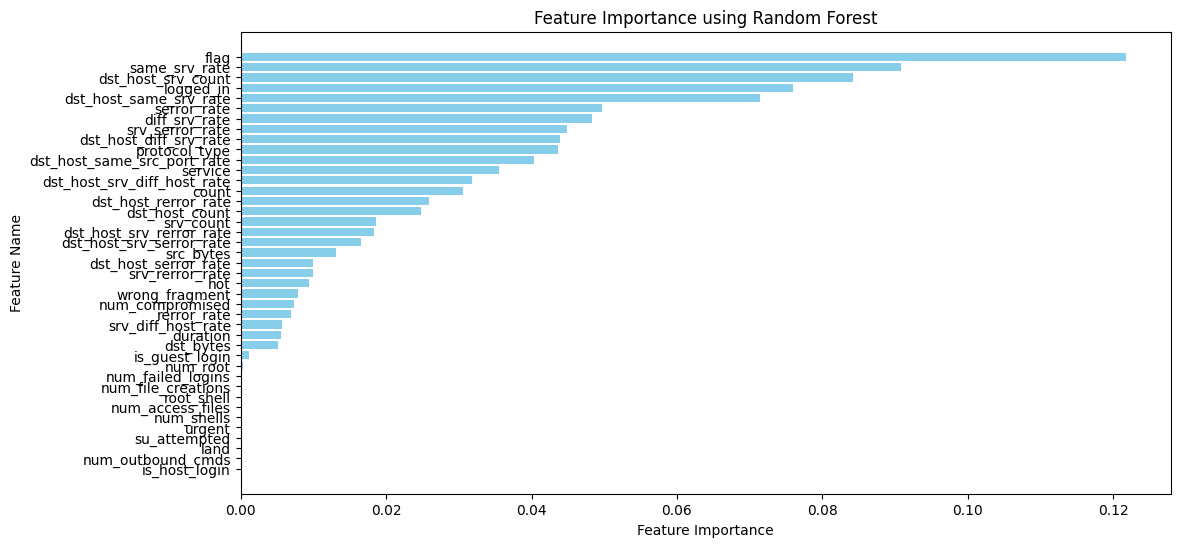

In [35]:

from sklearn.metrics import accuracy_score, confusion_matrix

# Split features and target
X = df_encoded.drop(columns=['class'])  # Features
y = df_encoded['class']  # Target variable

# Split into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Get feature importance
feature_importance = rf_model.feature_importances_
print(feature_importance)
# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance using Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [36]:

# Predict on the test set
y_pred = rf_model.predict(X_test)


In [37]:
print(len(rf_model.predict(X_test)))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

25195
Accuracy: 0.9974598134550506


In [38]:
std_dev= np.std(feature_importance)

In [39]:
y_pred_21= rf_model.predict(X_21)

In [40]:
y_actual_pred_21 = rf_model.predict(x_actual_21)

In [41]:
print(len(rf_model.predict(X_test)))

accuracy = accuracy_score(y_21, y_pred_21)
print("Accuracy:", accuracy)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_21, y_pred_21)
print("Confusion Matrix:")
print(conf_matrix)


25195
Accuracy: 0.7582505322924059
Confusion Matrix:
[[7649 5184]
 [ 266 9445]]


In [42]:
print(len(rf_model.predict(X_test)))

accuracy = accuracy_score(y_actual_21, y_actual_pred_21)
print("Accuracy:", accuracy)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_actual_21, y_actual_pred_21)
print("Confusion Matrix:")
print(conf_matrix)

25195
Accuracy: 0.5392405063291139
Confusion Matrix:
[[4521 5177]
 [ 283 1869]]


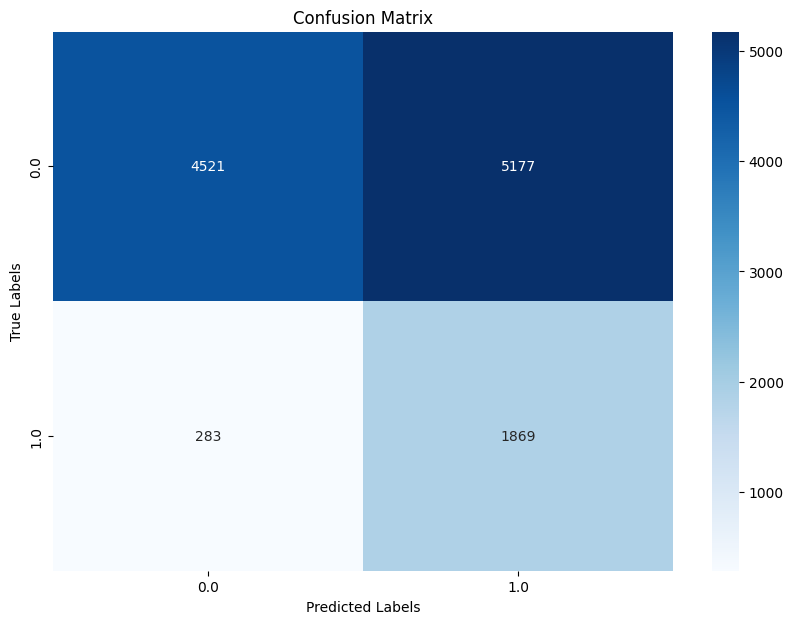

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [44]:
std_dev

0.029255795974011147

                        Feature  Permutation Importance
1                 protocol_type                0.012753
2                       service                0.007291
35  dst_host_same_src_port_rate                0.007089
31               dst_host_count                0.005759
11                    logged_in                0.004092
4                     src_bytes                0.003854
32           dst_host_srv_count                0.002715
39         dst_host_rerror_rate                0.002354
9                           hot                0.002187
34       dst_host_diff_srv_rate                0.001004
33       dst_host_same_srv_rate                0.000675
22                        count                0.000544
23                    srv_count                0.000318
37         dst_host_serror_rate                0.000302
36  dst_host_srv_diff_host_rate                0.000290
3                          flag                0.000238
5                     dst_bytes                0

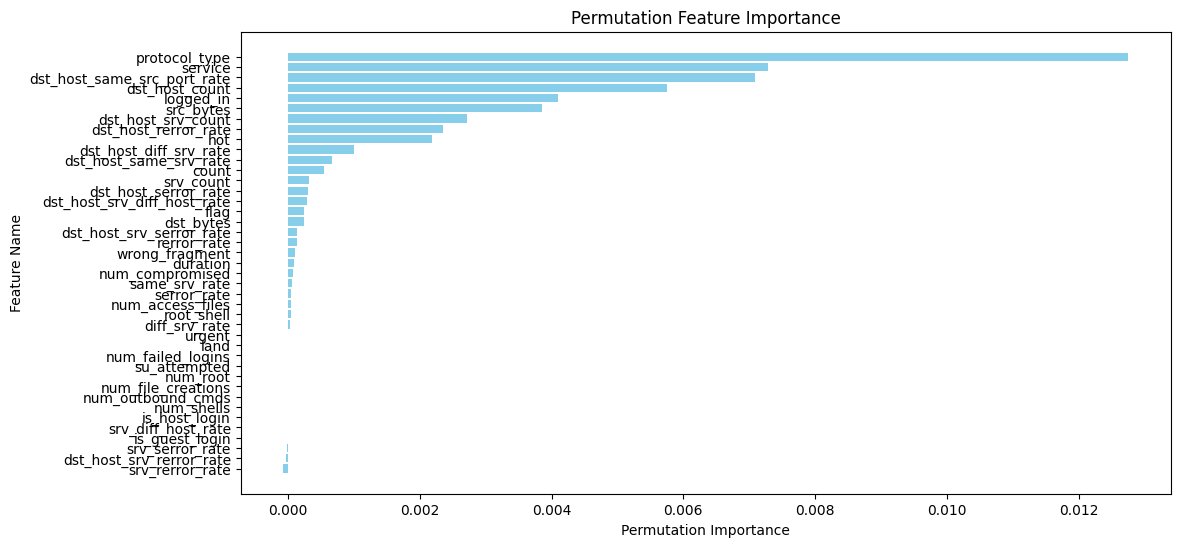

In [45]:
    from sklearn.inspection import permutation_importance

    result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
    importance_scores = result.importances_mean

    # Create DataFrame to view importances
    importance_df = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': importance_scores})
    importance_df = importance_df.sort_values(by='Permutation Importance', ascending=False)
    print(importance_df)
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    plt.barh(importance_df['Feature'], importance_df['Permutation Importance'], color='skyblue')
    plt.xlabel("Permutation Importance")
    plt.ylabel("Feature Name")
    plt.title("Permutation Feature Importance")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()


In [46]:
perm_mean_importance = importance_df['Permutation Importance'].mean()
perm_std_importance = importance_df['Permutation Importance'].std()
print(perm_mean_importance, perm_std_importance)

0.0012768696847516438 0.0026640150869498207


In [47]:
perm_threshold = perm_mean_importance
perm_important_features = importance_df[importance_df['Permutation Importance'] > perm_threshold]['Feature']

In [48]:
rf_threshold = std_dev
rf_important_features = feature_importance_df[feature_importance_df['Importance'] > rf_threshold]['Feature']

In [49]:
perm_X_reduced = X[perm_important_features]
perm_X_reduced



,protocol_type,service,dst_host_same_src_port_rate,dst_host_count,logged_in,src_bytes,dst_host_srv_count,dst_host_rerror_rate,hot
0,0.5,0.289855,0.17,0.588235,0.0,3.558064e-07,0.098039,0.05,0.0
1,1.0,0.637681,0.88,1.000000,0.0,1.057999e-07,0.003922,0.00,0.0
2,0.5,0.710145,0.00,1.000000,0.0,0.000000e+00,0.101961,0.00,0.0
3,0.5,0.347826,0.03,0.117647,1.0,1.681203e-07,1.000000,0.00,0.0
4,0.5,0.347826,0.00,1.000000,1.0,1.442067e-07,1.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...
125968,0.5,0.710145,0.00,1.000000,0.0,0.000000e+00,0.098039,0.00,0.0
125969,1.0,0.710145,0.01,1.000000,0.0,7.608895e-08,0.956863,0.00,0.0
125970,0.5,0.782609,0.00,1.000000,1.0,1.616709e-06,0.117647,0.01,0.0
125971,0.5,0.434783,0.00,1.000000,0.0,0.000000e+00,0.031373,0.00,0.0


In [50]:
rf_X_reduced = X[rf_important_features]
rf_X_reduced

,flag,same_srv_rate,dst_host_srv_count,logged_in,dst_host_same_srv_rate,serror_rate,diff_srv_rate,srv_serror_rate,dst_host_diff_srv_rate,protocol_type,dst_host_same_src_port_rate,service,dst_host_srv_diff_host_rate,count
0,0.9,1.00,0.098039,0.0,0.17,0.0,0.00,0.0,0.03,0.5,0.17,0.289855,0.00,0.003914
1,0.9,0.08,0.003922,0.0,0.00,0.0,0.15,0.0,0.60,1.0,0.88,0.637681,0.00,0.025440
2,0.5,0.05,0.101961,0.0,0.10,1.0,0.07,1.0,0.05,0.5,0.00,0.710145,0.00,0.240705
3,0.9,1.00,1.000000,1.0,1.00,0.2,0.00,0.2,0.00,0.5,0.03,0.347826,0.04,0.009785
4,0.9,1.00,1.000000,1.0,1.00,0.0,0.00,0.0,0.00,0.5,0.00,0.347826,0.00,0.058708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.5,0.14,0.098039,0.0,0.10,1.0,0.06,1.0,0.06,0.5,0.00,0.710145,0.00,0.360078
125969,0.9,1.00,0.956863,0.0,0.96,0.0,0.00,0.0,0.01,1.0,0.01,0.710145,0.00,0.003914
125970,0.9,1.00,0.117647,1.0,0.12,0.0,0.00,0.0,0.06,0.5,0.00,0.782609,0.00,0.001957
125971,0.5,0.06,0.031373,0.0,0.03,1.0,0.05,1.0,0.05,0.5,0.00,0.434783,0.00,0.281800


In [51]:
rf_X_21_reduced = X_21[rf_important_features]
rf_X_21_reduced

,flag,same_srv_rate,dst_host_srv_count,logged_in,dst_host_same_srv_rate,serror_rate,diff_srv_rate,srv_serror_rate,dst_host_diff_srv_rate,protocol_type,dst_host_same_src_port_rate,service,dst_host_srv_diff_host_rate,count
0,0.1,0.04,0.039216,0.0,0.04,0.0,0.06,0.00,0.06,0.5,0.00,0.714286,0.00,0.448141
1,0.1,0.01,0.003922,0.0,0.00,0.0,0.06,0.00,0.06,0.5,0.00,0.714286,0.00,0.266145
2,0.9,1.00,0.337255,0.0,0.61,0.0,0.00,0.00,0.04,0.5,0.61,0.301587,0.02,0.001957
3,0.9,1.00,0.223529,0.0,1.00,0.0,0.00,0.00,0.00,0.0,1.00,0.206349,0.28,0.001957
4,0.2,1.00,0.337255,0.0,0.31,0.0,0.00,0.12,0.17,0.5,0.03,0.873016,0.02,0.001957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.9,1.00,0.552941,1.0,0.72,0.0,0.00,0.00,0.06,0.5,0.01,0.777778,0.01,0.001957
22540,0.9,1.00,1.000000,1.0,1.00,0.0,0.00,0.00,0.00,0.5,0.01,0.349206,0.01,0.003914
22541,0.9,1.00,1.000000,1.0,1.00,0.0,0.00,0.00,0.00,0.5,0.00,0.349206,0.00,0.009785
22542,0.9,1.00,0.988235,0.0,0.99,0.0,0.00,0.00,0.01,1.0,0.00,0.174603,0.00,0.007828


In [52]:
rf_x_actual_21_reduced = x_actual_21[rf_important_features]
rf_x_actual_21_reduced

,flag,same_srv_rate,dst_host_srv_count,logged_in,dst_host_same_srv_rate,serror_rate,diff_srv_rate,srv_serror_rate,dst_host_diff_srv_rate,protocol_type,dst_host_same_src_port_rate,service,dst_host_srv_diff_host_rate,count
0,0.9,1.00,0.035433,1.0,0.38,0.0,0.0,0.00,0.12,0.5,0.04,0.868852,0.00,0.001957
1,0.9,0.75,0.996063,0.0,1.00,0.0,0.5,0.00,0.01,1.0,0.01,0.721311,0.00,0.007828
2,0.8,1.00,0.307087,0.0,0.31,1.0,0.0,1.00,0.61,0.5,0.00,0.868852,0.00,0.001957
3,0.9,1.00,1.000000,0.0,1.00,0.0,0.0,0.00,0.00,1.0,0.87,0.721311,0.00,1.000000
4,1.0,1.00,0.000000,0.0,0.06,1.0,0.0,1.00,1.00,0.5,1.00,0.721311,0.00,0.001957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0.9,1.00,1.000000,0.0,1.00,0.0,0.0,0.00,0.00,1.0,0.01,0.180328,0.00,0.305284
11846,0.9,1.00,0.917323,1.0,0.92,0.0,0.0,0.00,0.02,0.5,0.00,0.360656,0.00,0.017613
11847,0.2,1.00,0.374016,0.0,0.37,0.0,0.0,0.14,0.03,0.5,0.01,0.868852,0.02,0.001957
11848,0.1,0.20,0.200787,0.0,0.19,0.0,0.8,0.00,0.03,0.5,0.01,0.819672,0.04,0.009785


In [53]:
perm_X_21_reduced = X_21[perm_important_features]
perm_X_21_reduced

,protocol_type,service,dst_host_same_src_port_rate,dst_host_count,logged_in,src_bytes,dst_host_srv_count,dst_host_rerror_rate,hot
0,0.5,0.714286,0.00,1.000000,0.0,0.000000e+00,0.039216,1.00,0.000000
1,0.5,0.714286,0.00,1.000000,0.0,0.000000e+00,0.003922,1.00,0.000000
2,0.5,0.301587,0.61,0.525490,0.0,2.066513e-04,0.337255,0.00,0.000000
3,0.0,0.206349,1.00,0.011765,0.0,3.183413e-07,0.223529,0.00,0.000000
4,0.5,0.873016,0.03,0.113725,0.0,0.000000e+00,0.337255,0.83,0.000000
...,...,...,...,...,...,...,...,...,...
22539,0.5,0.777778,0.01,0.392157,1.0,1.263815e-05,0.552941,0.00,0.000000
22540,0.5,0.349206,0.01,0.772549,1.0,5.045710e-06,1.000000,0.00,0.000000
22541,0.5,0.349206,0.00,1.000000,1.0,8.681168e-04,1.000000,0.07,0.019802
22542,1.0,0.174603,0.00,1.000000,0.0,6.685168e-07,0.988235,0.00,0.000000


In [54]:
perm_x_actual_21_reduced = x_actual_21[perm_important_features]
perm_x_actual_21_reduced

,protocol_type,service,dst_host_same_src_port_rate,dst_host_count,logged_in,src_bytes,dst_host_srv_count,dst_host_rerror_rate,hot
0,0.5,0.868852,0.04,0.098425,1.0,1.878214e-06,0.035433,0.12,0.0
1,1.0,0.721311,0.01,1.000000,0.0,7.003509e-07,0.996063,0.00,0.0
2,0.5,0.868852,0.00,1.000000,0.0,0.000000e+00,0.307087,0.60,0.0
3,1.0,0.721311,0.87,1.000000,0.0,8.436045e-07,1.000000,0.00,0.0
4,0.5,0.721311,1.00,0.059055,0.0,0.000000e+00,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...
11845,1.0,0.180328,0.01,1.000000,0.0,6.844338e-07,1.000000,0.00,0.0
11846,0.5,0.360656,0.00,1.000000,1.0,5.348134e-06,0.917323,0.05,0.0
11847,0.5,0.868852,0.01,0.692913,0.0,0.000000e+00,0.374016,0.85,0.0
11848,0.5,0.819672,0.01,0.669291,0.0,0.000000e+00,0.200787,0.88,0.0


In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(perm_X_reduced, y)


In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Define and train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel is usually best
svm_model.fit(X_scaled, y_resampled)

# Predict on test data
perm_X_21_scaled = scaler.transform(perm_X_21_reduced)
y_pred = svm_model.predict(perm_X_21_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_21, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")

# ----- Cross Validation Part -----
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_scaled, y_resampled, cv=kf, scoring='accuracy')

# Display Cross-Validation Results
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")


SVM Accuracy: 0.7885
Cross-Validation Scores: [0.97936001 0.98099269 0.98106693 0.98114118 0.98128968]
Mean Cross-Validation Accuracy: 0.9808


In [57]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np


# Define NN Model
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)),  # Input layer
    keras.layers.Dense(32, activation='relu'),  # Hidden layer
    keras.layers.Dense(16, activation='relu'),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (Binary Classification)
])

# Compile Model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
nn_model.fit(X_resampled, y_resampled, epochs=50, batch_size=32, verbose=1)

# Predict on Test Data
y_pred_probs = nn_model.predict(perm_X_21_reduced)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to 0/1

# Evaluate Accuracy
accuracy = accuracy_score(y_21, y_pred)
print(f"NN Accuracy: {accuracy:.4f}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9348 - loss: 0.1776
Epoch 2/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9778 - loss: 0.0669
Epoch 3/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9805 - loss: 0.0561
Epoch 4/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9828 - loss: 0.0511
Epoch 5/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9828 - loss: 0.0496
Epoch 6/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9833 - loss: 0.0477
Epoch 7/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9845 - loss: 0.0448
Epoch 8/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9856 - loss: 0.0424
Epoch 9/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9855 - loss: 0.0416
Epoch 10/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9854 - loss: 0.0416
Epoch 11/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9874 - loss: 0.0379
Epoch 12/50
4209/4209 ━━━━━━━━

In [58]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np


# Define NN Model
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)),  # Input layer
    keras.layers.Dense(32, activation='relu'),  # Hidden layer
    keras.layers.Dense(16, activation='relu'),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (Binary Classification)
])

# Compile Model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
nn_model.fit(X_resampled, y_resampled, epochs=50, batch_size=32, verbose=1)

#predict on test data
y_actual_pred_probs = nn_model.predict(perm_x_actual_21_reduced)
y_actual_pred = (y_actual_pred_probs > 0.5).astype(int)

# Evaluate Accuracy
accuracy = accuracy_score(y_actual_21, y_actual_pred)
print(f"NN Accuracy: {accuracy:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4209/4209 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9412 - loss: 0.1673
Epoch 2/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9759 - loss: 0.0705
Epoch 3/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9814 - loss: 0.0546
Epoch 4/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9828 - loss: 0.0515
Epoch 5/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9832 - loss: 0.0496
Epoch 6/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9846 - loss: 0.0453
Epoch 7/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9852 - loss: 0.0431
Epoch 8/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9849 - loss: 0.0435
Epoch 9/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9854 - loss: 0.0422
Epoch 10/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9859 - loss: 0.0414
Epoch 11/50
4209/4209 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9861 - loss: 0.0409
Epoch 12/50
4209/4209 ━━━━━━━━━━━━━━━━━━━

In [64]:
!pip install xgboost lightgbm catboost
!pip install --upgrade catboost
!pip install --upgrade optuna

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score, KFold
import optuna
import lightgbm as lgb
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective_lgb(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 31, 256),
        'max_depth': trial.suggest_int('max_depth', -1, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0)
    }

    # Cross-Validation setup
    model = lgb.LGBMClassifier(**params)
    model.fit(X_resampled, y_resampled, eval_set=[(perm_X_21_reduced, y_21)])
    y_pred = model.predict(perm_X_21_reduced)
    accuracy = accuracy_score(y_21, y_pred)
    return accuracy

# Run Optuna optimization
study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=50)

# Best hyperparameters from Optuna
best_params_lgb = study_lgb.best_trial.params
print("\n🚀 Best Hyperparameters for LightGBM:", best_params_lgb)

# Train model with best hyperparameters
best_model_lgb = lgb.LGBMClassifier(**best_params_lgb)
best_model_lgb.fit(X_resampled, y_resampled)

# Predict on test data
y_pred_lgb = best_model_lgb.predict(perm_X_21_reduced)

# Evaluate accuracy
accuracy_lgb = accuracy_score(y_21, y_pred_lgb)
print(f"\n✅ Optimized LightGBM Model Accuracy: {accuracy_lgb:.4f}")
print("\n📊 Classification Report for LightGBM:\n", classification_report(y_21, y_pred_lgb))

# Cross-Validation on final model
final_cv_scores = cross_val_score(best_model_lgb, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"\n📈 Final Cross-Validation Scores: {final_cv_scores}")
print(f"📊 Mean Cross-Validation Accuracy: {final_cv_scores.mean():.4f}")


[I 2025-02-07 19:16:43,648] A new study created in memory with name: no-name-7fb0c3ae-ba7b-4ea8-bcd4-6d0f8081631f


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2025-02-07 19:16:45,336] Trial 0 finished with value: 0.8148953158268275 and parameters: {'n_estimators': 263, 'learning_rate': 0.1083156436883878, 'num_leaves': 194, 'max_depth': 7, 'min_child_samples': 31, 'subsample': 0.9487797610197792, 'colsample_bytree': 0.9774095465609502, 'reg_alpha': 9.722444997893337, 'reg_lambda': 1.1811871925981177}. Best is trial 0 with value: 0.8148953158268275.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-02-07 19:16:45,759] Trial 1 finished with value: 0.7636178140525195 and parameters: {'n_estimators': 84, 'learning_rate': 0.05597902968934974, 'num_leaves': 98, 'max_depth': 1, 'min_child_samples': 35, 'subsample': 0.7605701829328189, 'colsample_bytree': 0.853288271318107, 'reg_alpha': 8.331209473829391, 'reg_lambda': 9.677106418069775}. Best is trial 0 with value: 0.8148953158268275.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-07 19:16:46,875] Trial 2 finished with value: 0.8048261178140526 and parameters: {'n_estimators': 109, 'learning_rate': 0.061480838496274344, 'num_leaves': 207, 'max_depth': 10, 'min_child_samples': 22, 'subsample': 0.930584570261511, 'colsample_bytree': 0.537855256368458, 'reg_alpha': 5.622377441057537, 'reg_lambda': 4.160988500207567}. Best is trial 0 with value: 0.8148953158268275.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:16:48,320] Trial 3 finished with value: 0.7903655074520937 and parameters: {'n_estimators': 151, 'learning_rate': 0.1543830063332331, 'num_leaves': 239, 'max_depth': 7, 'min_child_samples': 86, 'subsample': 0.8109299809141112, 'colsample_bytree': 0.5441125335642405, 'reg_alpha': 2.509992676042386, 'reg_lambda': 2.4485946675893757}. Best is trial 0 with value: 0.8148953158268275.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:16:49,752] Trial 4 finished with value: 0.7981724627395316 and parameters: {'n_estimators': 254, 'learning_rate': 0.201850881429892, 'num_leaves': 78, 'max_depth': 15, 'min_child_samples': 49, 'subsample': 0.7931395510689345, 'colsample_bytree': 0.5306633927245366, 'reg_alpha': 7.274462887814096, 'reg_lambda': 3.150753309106038}. Best is trial 0 with value: 0.8148953158268275.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-02-07 19:16:50,969] Trial 5 finished with value: 0.8153388928317956 and parameters: {'n_estimators': 195, 'learning_rate': 0.15355048637253468, 'num_leaves': 237, 'max_depth': 14, 'min_child_samples': 8, 'subsample': 0.8025244721784178, 'colsample_bytree': 0.8031146276865636, 'reg_alpha': 9.201105075526904, 'reg_lambda': 1.1970599938693716}. Best is trial 5 with value: 0.8153388928317956.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped 

[I 2025-02-07 19:16:52,832] Trial 6 finished with value: 0.8039389638041164 and parameters: {'n_estimators': 255, 'learning_rate': 0.1952641385753757, 'num_leaves': 69, 'max_depth': 9, 'min_child_samples': 99, 'subsample': 0.7125785898648138, 'colsample_bytree': 0.6756469116708206, 'reg_alpha': 7.877363550017452, 'reg_lambda': 9.194752302647093}. Best is trial 5 with value: 0.8153388928317956.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info]

[I 2025-02-07 19:16:54,064] Trial 7 finished with value: 0.805402767920511 and parameters: {'n_estimators': 219, 'learning_rate': 0.2918094358335687, 'num_leaves': 76, 'max_depth': -1, 'min_child_samples': 11, 'subsample': 0.8072829921822056, 'colsample_bytree': 0.964039303697741, 'reg_alpha': 6.996600597308618, 'reg_lambda': 6.821399206890607}. Best is trial 5 with value: 0.8153388928317956.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-02-07 19:16:55,632] Trial 8 finished with value: 0.8234119943222143 and parameters: {'n_estimators': 293, 'learning_rate': 0.19441636550405367, 'num_leaves': 130, 'max_depth': 12, 'min_child_samples': 52, 'subsample': 0.9833593993585803, 'colsample_bytree': 0.9948864869271643, 'reg_alpha': 4.701221752267507, 'reg_lambda': 0.9689176065488447}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:16:56,038] Trial 9 finished with value: 0.805846344925479 and parameters: {'n_estimators': 62, 'learning_rate': 0.07019840282963254, 'num_leaves': 137, 'max_depth': 2, 'min_child_samples': 69, 'subsample': 0.6435260883551068, 'colsample_bytree': 0.8416757807040314, 'reg_alpha': 6.422213037217822, 'reg_lambda': 5.805220969824891}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-07 19:16:57,601] Trial 10 finished with value: 0.8084634492547906 and parameters: {'n_estimators': 300, 'learning_rate': 0.2755038074412576, 'num_leaves': 32, 'max_depth': 12, 'min_child_samples': 61, 'subsample': 0.5592098730343575, 'colsample_bytree': 0.7009146507932357, 'reg_alpha': 3.1791441652637658, 'reg_lambda': 0.4232942192451947}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-02-07 19:16:58,979] Trial 11 finished with value: 0.8068222143364088 and parameters: {'n_estimators': 168, 'learning_rate': 0.16213584744816037, 'num_leaves': 152, 'max_depth': 15, 'min_child_samples': 7, 'subsample': 0.995504417989773, 'colsample_bytree': 0.8487451198315963, 'reg_alpha': 4.447536664635398, 'reg_lambda': 0.05983692904868465}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:00,697] Trial 12 finished with value: 0.8073988644428672 and parameters: {'n_estimators': 199, 'learning_rate': 0.23308344719378632, 'num_leaves': 146, 'max_depth': 12, 'min_child_samples': 46, 'subsample': 0.8789658200546964, 'colsample_bytree': 0.7747590958675822, 'reg_alpha': 1.222033113311821, 'reg_lambda': 2.3339674406942903}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No 

[I 2025-02-07 19:17:01,975] Trial 13 finished with value: 0.8211053938963804 and parameters: {'n_estimators': 130, 'learning_rate': 0.1398401849601728, 'num_leaves': 253, 'max_depth': 13, 'min_child_samples': 76, 'subsample': 0.8877673704895803, 'colsample_bytree': 0.9201050900314173, 'reg_alpha': 4.29651551466844, 'reg_lambda': 1.5124486411316531}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[I 2025-02-07 19:17:03,248] Trial 14 finished with value: 0.7980393896380412 and parameters: {'n_estimators': 139, 'learning_rate': 0.015256382548985425, 'num_leaves': 184, 'max_depth': 11, 'min_child_samples': 76, 'subsample': 0.8802140633089564, 'colsample_bytree': 0.9117123592296422, 'reg_alpha': 4.329402526162154, 'reg_lambda': 4.423954574263934}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, num

[I 2025-02-07 19:17:04,260] Trial 15 finished with value: 0.8110805535841022 and parameters: {'n_estimators': 110, 'learning_rate': 0.11296578377319644, 'num_leaves': 117, 'max_depth': 7, 'min_child_samples': 61, 'subsample': 0.9990716806004974, 'colsample_bytree': 0.9995641061189069, 'reg_alpha': 0.10620778677195908, 'reg_lambda': 2.9487741846904907}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:05,626] Trial 16 finished with value: 0.8136533002129169 and parameters: {'n_estimators': 130, 'learning_rate': 0.24023645824422887, 'num_leaves': 170, 'max_depth': 13, 'min_child_samples': 81, 'subsample': 0.8803562510972109, 'colsample_bytree': 0.9081269124362252, 'reg_alpha': 2.94068256285896, 'reg_lambda': 7.787781360477023}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:07,576] Trial 17 finished with value: 0.819597232079489 and parameters: {'n_estimators': 298, 'learning_rate': 0.12002388913404377, 'num_leaves': 219, 'max_depth': 9, 'min_child_samples': 98, 'subsample': 0.9302195039352317, 'colsample_bytree': 0.9171863170721253, 'reg_alpha': 5.198892808365403, 'reg_lambda': 1.5358171088613664}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-02-07 19:17:08,083] Trial 18 finished with value: 0.8052253371185237 and parameters: {'n_estimators': 52, 'learning_rate': 0.195348574476954, 'num_leaves': 254, 'max_depth': 4, 'min_child_samples': 57, 'subsample': 0.6839893905368333, 'colsample_bytree': 0.6224730569802648, 'reg_alpha': 3.840719148677505, 'reg_lambda': 3.681531764650512}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-07 19:17:09,932] Trial 19 finished with value: 0.812278211497516 and parameters: {'n_estimators': 215, 'learning_rate': 0.23513588051399525, 'num_leaves': 119, 'max_depth': 12, 'min_child_samples': 41, 'subsample': 0.8490583913560655, 'colsample_bytree': 0.9419620213345022, 'reg_alpha': 1.5430481030297027, 'reg_lambda': 5.284429758924328}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:11,332] Trial 20 finished with value: 0.8091731724627396 and parameters: {'n_estimators': 175, 'learning_rate': 0.17155260754753884, 'num_leaves': 174, 'max_depth': 9, 'min_child_samples': 70, 'subsample': 0.5052966902169092, 'colsample_bytree': 0.8840591332981247, 'reg_alpha': 6.024757449063856, 'reg_lambda': 1.8977310054382297}. Best is trial 8 with value: 0.8234119943222143.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:13,327] Trial 21 finished with value: 0.823944286728176 and parameters: {'n_estimators': 297, 'learning_rate': 0.12203498151839459, 'num_leaves': 211, 'max_depth': 9, 'min_child_samples': 100, 'subsample': 0.9403849462929995, 'colsample_bytree': 0.933011334497125, 'reg_alpha': 5.2889613754727804, 'reg_lambda': 1.0071909607457412}. Best is trial 21 with value: 0.823944286728176.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2025-02-07 19:17:15,139] Trial 22 finished with value: 0.8059794180269695 and parameters: {'n_estimators': 281, 'learning_rate': 0.1326612492879187, 'num_leaves': 256, 'max_depth': 5, 'min_child_samples': 90, 'subsample': 0.9447387954657633, 'colsample_bytree': 0.9950896050434734, 'reg_alpha': 4.906386435279611, 'reg_lambda': 0.7713425362420018}. Best is trial 21 with value: 0.823944286728176.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:17,320] Trial 23 finished with value: 0.8237668559261888 and parameters: {'n_estimators': 239, 'learning_rate': 0.0879077215743938, 'num_leaves': 221, 'max_depth': 10, 'min_child_samples': 89, 'subsample': 0.9691025744619132, 'colsample_bytree': 0.9416030111237763, 'reg_alpha': 3.7894199802695736, 'reg_lambda': 0.2833418265544232}. Best is trial 21 with value: 0.823944286728176.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2025-02-07 19:17:19,463] Trial 24 finished with value: 0.8286462029808375 and parameters: {'n_estimators': 235, 'learning_rate': 0.08875095908661702, 'num_leaves': 213, 'max_depth': 10, 'min_child_samples': 93, 'subsample': 0.9812079885418059, 'colsample_bytree': 0.9530312285511736, 'reg_alpha': 3.557318968991376, 'reg_lambda': 0.4903278036197239}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:21,441] Trial 25 finished with value: 0.8262952448545068 and parameters: {'n_estimators': 219, 'learning_rate': 0.0864388268091097, 'num_leaves': 217, 'max_depth': 10, 'min_child_samples': 89, 'subsample': 0.9569093203950115, 'colsample_bytree': 0.8774712205585519, 'reg_alpha': 3.427079178585156, 'reg_lambda': 0.03044523591710635}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:23,268] Trial 26 finished with value: 0.7902767920511 and parameters: {'n_estimators': 235, 'learning_rate': 0.0379277474441419, 'num_leaves': 202, 'max_depth': 5, 'min_child_samples': 94, 'subsample': 0.9131860363168602, 'colsample_bytree': 0.8058966619918316, 'reg_alpha': 2.2421059116357513, 'reg_lambda': 0.027772289289739627}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:26,088] Trial 27 finished with value: 0.8213715400993612 and parameters: {'n_estimators': 272, 'learning_rate': 0.08868627763997493, 'num_leaves': 222, 'max_depth': 10, 'min_child_samples': 81, 'subsample': 0.8462884913449518, 'colsample_bytree': 0.8717267920570057, 'reg_alpha': 3.2838115108079133, 'reg_lambda': 2.2101156908239843}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:28,464] Trial 28 finished with value: 0.8159599006387509 and parameters: {'n_estimators': 238, 'learning_rate': 0.09632307268773342, 'num_leaves': 168, 'max_depth': 8, 'min_child_samples': 99, 'subsample': 0.9583011359559261, 'colsample_bytree': 0.7322434570610556, 'reg_alpha': 1.0643669011830617, 'reg_lambda': 3.2573520361341184}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:30,658] Trial 29 finished with value: 0.823944286728176 and parameters: {'n_estimators': 264, 'learning_rate': 0.033613736592406344, 'num_leaves': 193, 'max_depth': 6, 'min_child_samples': 85, 'subsample': 0.9126740678256805, 'colsample_bytree': 0.9602769946334141, 'reg_alpha': 2.195732806608569, 'reg_lambda': 0.9944317666149434}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:32,474] Trial 30 finished with value: 0.8083303761533002 and parameters: {'n_estimators': 216, 'learning_rate': 0.10468534670973773, 'num_leaves': 233, 'max_depth': 8, 'min_child_samples': 94, 'subsample': 0.9587921158987646, 'colsample_bytree': 0.8084331903805002, 'reg_alpha': 5.6346708494795825, 'reg_lambda': 1.625201931056002}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2025-02-07 19:17:34,554] Trial 31 finished with value: 0.8083303761533002 and parameters: {'n_estimators': 268, 'learning_rate': 0.026490647638453296, 'num_leaves': 189, 'max_depth': 6, 'min_child_samples': 87, 'subsample': 0.9142145947246564, 'colsample_bytree': 0.9531483868993037, 'reg_alpha': 2.0136378896353424, 'reg_lambda': 0.8562377896864506}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:36,258] Trial 32 finished with value: 0.7889017033356991 and parameters: {'n_estimators': 283, 'learning_rate': 0.04691296884643836, 'num_leaves': 202, 'max_depth': 3, 'min_child_samples': 82, 'subsample': 0.845652995147722, 'colsample_bytree': 0.8793223149757702, 'reg_alpha': 3.4996228632381188, 'reg_lambda': 0.6837479436105299}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[I 2025-02-07 19:17:38,464] Trial 33 finished with value: 0.8215933286018453 and parameters: {'n_estimators': 253, 'learning_rate': 0.07478150026262097, 'num_leaves': 212, 'max_depth': 7, 'min_child_samples': 93, 'subsample': 0.9085198974468073, 'colsample_bytree': 0.9612986321130086, 'reg_alpha': 0.4791395099091338, 'reg_lambda': 1.2194026457063813}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:40,117] Trial 34 finished with value: 0.8031848828956707 and parameters: {'n_estimators': 197, 'learning_rate': 0.049015374341330124, 'num_leaves': 190, 'max_depth': 6, 'min_child_samples': 70, 'subsample': 0.9488244772527551, 'colsample_bytree': 0.8910585229963924, 'reg_alpha': 2.736701273858299, 'reg_lambda': 2.519938500404371}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:42,187] Trial 35 finished with value: 0.7971078779276083 and parameters: {'n_estimators': 233, 'learning_rate': 0.010162299249639906, 'num_leaves': 160, 'max_depth': 8, 'min_child_samples': 26, 'subsample': 0.7496690169735368, 'colsample_bytree': 0.8360712149042195, 'reg_alpha': 5.391702369046794, 'reg_lambda': 1.8378490634024338}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:44,948] Trial 36 finished with value: 0.8207061745919092 and parameters: {'n_estimators': 265, 'learning_rate': 0.07013586500104825, 'num_leaves': 234, 'max_depth': 11, 'min_child_samples': 85, 'subsample': 0.9742592103833109, 'colsample_bytree': 0.9373677824334272, 'reg_alpha': 1.9416775773531834, 'reg_lambda': 0.5394151688309771}. Best is trial 24 with value: 0.8286462029808375.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:46,729] Trial 37 finished with value: 0.8306422995031938 and parameters: {'n_estimators': 246, 'learning_rate': 0.1326760408595178, 'num_leaves': 200, 'max_depth': 10, 'min_child_samples': 74, 'subsample': 0.9193355362146786, 'colsample_bytree': 0.9792801996822508, 'reg_alpha': 3.835055117099401, 'reg_lambda': 0.06041117572738157}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:48,347] Trial 38 finished with value: 0.7956440738112136 and parameters: {'n_estimators': 187, 'learning_rate': 0.1273511707080562, 'num_leaves': 210, 'max_depth': 11, 'min_child_samples': 75, 'subsample': 0.9407253171266986, 'colsample_bytree': 0.5890569349812834, 'reg_alpha': 3.9924412907750266, 'reg_lambda': 0.10088190620423275}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:50,198] Trial 39 finished with value: 0.8007008516678495 and parameters: {'n_estimators': 224, 'learning_rate': 0.14238400422475916, 'num_leaves': 179, 'max_depth': 9, 'min_child_samples': 95, 'subsample': 0.8341385871173537, 'colsample_bytree': 0.5018039259438991, 'reg_alpha': 6.615986009300697, 'reg_lambda': 8.770326804623188}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2025-02-07 19:17:51,543] Trial 40 finished with value: 0.8015436479772888 and parameters: {'n_estimators': 246, 'learning_rate': 0.17078442762994162, 'num_leaves': 241, 'max_depth': 10, 'min_child_samples': 89, 'subsample': 0.9812024297719605, 'colsample_bytree': 0.9742553487748724, 'reg_alpha': 9.665795449104138, 'reg_lambda': 1.2471279438553624}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:17:53,700] Trial 41 finished with value: 0.8183552164655784 and parameters: {'n_estimators': 275, 'learning_rate': 0.10727676482859613, 'num_leaves': 197, 'max_depth': 8, 'min_child_samples': 84, 'subsample': 0.9030873735323776, 'colsample_bytree': 0.9753400827176751, 'reg_alpha': 2.6264215535191293, 'reg_lambda': 0.9152067106141393}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-02-07 19:17:55,939] Trial 42 finished with value: 0.8209279630943932 and parameters: {'n_estimators': 255, 'learning_rate': 0.07941296415370484, 'num_leaves': 217, 'max_depth': 6, 'min_child_samples': 100, 'subsample': 0.9288210263541496, 'colsample_bytree': 0.9341926537259295, 'reg_alpha': 3.4428058322763593, 'reg_lambda': 0.4374988206190014}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2025-02-07 19:17:58,910] Trial 43 finished with value: 0.8240773598296665 and parameters: {'n_estimators': 286, 'learning_rate': 0.05607721472487218, 'num_leaves': 196, 'max_depth': 9, 'min_child_samples': 77, 'subsample': 0.7732283332188852, 'colsample_bytree': 0.9656762407351158, 'reg_alpha': 4.939818246203025, 'reg_lambda': 1.2904820559138455}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2025-02-07 19:18:00,890] Trial 44 finished with value: 0.8209279630943932 and parameters: {'n_estimators': 287, 'learning_rate': 0.09976400182312545, 'num_leaves': 228, 'max_depth': 11, 'min_child_samples': 79, 'subsample': 0.7670404801485355, 'colsample_bytree': 0.903694526894044, 'reg_alpha': 4.9012625209767835, 'reg_lambda': 2.7334529512106487}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:18:03,014] Trial 45 finished with value: 0.8035397444996452 and parameters: {'n_estimators': 224, 'learning_rate': 0.06691440363752825, 'num_leaves': 240, 'max_depth': 9, 'min_child_samples': 64, 'subsample': 0.6942297881698369, 'colsample_bytree': 0.9833233635862256, 'reg_alpha': 7.532967863802517, 'reg_lambda': 1.9823651409272225}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:18:05,690] Trial 46 finished with value: 0.8258960255500355 and parameters: {'n_estimators': 289, 'learning_rate': 0.059204994686585036, 'num_leaves': 208, 'max_depth': 10, 'min_child_samples': 73, 'subsample': 0.6151718006171522, 'colsample_bytree': 0.8593834511993548, 'reg_alpha': 5.919816621623343, 'reg_lambda': 0.04972672728647327}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:18:07,621] Trial 47 finished with value: 0.8035397444996452 and parameters: {'n_estimators': 206, 'learning_rate': 0.06071630497477582, 'num_leaves': 204, 'max_depth': 13, 'min_child_samples': 66, 'subsample': 0.64159491645074, 'colsample_bytree': 0.8577941720897334, 'reg_alpha': 8.697816307016641, 'reg_lambda': 0.05399624437654736}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:18:09,785] Trial 48 finished with value: 0.8156937544357701 and parameters: {'n_estimators': 250, 'learning_rate': 0.0841055714723031, 'num_leaves': 34, 'max_depth': -1, 'min_child_samples': 74, 'subsample': 0.5948013712996577, 'colsample_bytree': 0.7783282323998238, 'reg_alpha': 5.931589454818189, 'reg_lambda': 0.5163345351764522}. Best is trial 37 with value: 0.8306422995031938.


[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[I 2025-02-07 19:18:11,459] Trial 49 finished with value: 0.8097941802696949 and parameters: {'n_estimators': 163, 'learning_rate': 0.05039895781490017, 'num_leaves': 155, 'max_depth': 14, 'min_child_samples': 56, 'subsample': 0.5841371537547704, 'colsample_bytree': 0.8584286885260713, 'reg_alpha': 4.418353530628462, 'reg_lambda': 1.4047875634584586}. Best is trial 37 with value: 0.8306422995031938.



🚀 Best Hyperparameters for LightGBM: {'n_estimators': 246, 'learning_rate': 0.1326760408595178, 'num_leaves': 200, 'max_depth': 10, 'min_child_samples': 74, 'subsample': 0.9193355362146786, 'colsample_bytree': 0.9792801996822508, 'reg_alpha': 3.835055117099401, 'reg_lambda': 0.06041117572738157}
[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [60]:
# import optuna
# from catboost import CatBoostClassifier
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.metrics import accuracy_score

# # Objective function with Cross-Validation
# def objective_cat(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 50, 300),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'depth': trial.suggest_int('depth', 3, 10),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
#         'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
#         'random_strength': trial.suggest_float('random_strength', 1e-9, 10.0)
#     }

#     model = CatBoostClassifier(
#         **params,
#         loss_function='Logloss',
#         eval_metric='Accuracy',
#         verbose=0
#     )

#     # K-Fold Cross-Validation
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='accuracy')

#     # Return mean cross-validation accuracy
#     return cv_scores.mean()

# # Run Optuna Study
# study_cat = optuna.create_study(direction='maximize')
# study_cat.optimize(objective_cat, n_trials=50)

# # Store best parameters
# best_catboost_params = study_cat.best_params

# # 🔹 Train Final CatBoost Model
# best_cat_model = CatBoostClassifier(**best_catboost_params, loss_function='Logloss', eval_metric='Accuracy', verbose=0)
# best_cat_model.fit(X_resampled, y_resampled)

# # 🔹 Predictions on Test Data
# y_pred_final = best_cat_model.predict(perm_X_21_reduced)
# final_accuracy = accuracy_score(y_21, y_pred_final)

# print("✅ Best CatBoost Parameters:", best_catboost_params)
# print("🏆 Final CatBoost Accuracy:", final_accuracy)

# # 🔹 Cross-Validation on Final Model
# final_cv_scores = cross_val_score(best_cat_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
# print(f"\n📈 Final Cross-Validation Scores: {final_cv_scores}")
# print(f"📊 Mean Cross-Validation Accuracy: {final_cv_scores.mean():.4f}")


In [63]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

# 🔹 Define Optuna Objective Function with Cross-Validation
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
    }

    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(perm_X_21_reduced)
    accuracy = accuracy_score(y_21, y_pred)
    return accuracy # Return Mean Accuracy

# 🔹 Run Optuna Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 🎯 Best Parameters Found
best_params = study.best_trial.params
print("\n🚀 Best Hyperparameters:", best_params)

# 🔹 Train Final Model with Best Hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_model.fit(X_resampled, y_resampled)

# 🔹 Make Final Predictions on Test Data
y_pred = best_model.predict(perm_X_21_reduced)
y_actual_pred = best_model.predict(perm_x_actual_21_reduced)

# 🔹 Evaluate Performance
accuracy = accuracy_score(y_21, y_pred)

print(f"\n✅ Optimized Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_21, y_pred))

actual_accuracy = accuracy_score(y_actual_21, y_actual_pred)
print(f"\n✅ Optimized Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_actual_21, y_actual_pred))


# 🔹 Final Cross-Validation on Optimized Model
final_cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"\n📈 Final Cross-Validation Scores: {final_cv_scores}")
print(f"📊 Mean Cross-Validation Accuracy: {final_cv_scores.mean():.4f}")


[I 2025-02-07 19:07:27,967] A new study created in memory with name: no-name-76cb126b-d1b8-49f9-b7c4-41c68bc2dadb
[I 2025-02-07 19:07:30,774] Trial 0 finished with value: 0.7993257629524485 and parameters: {'n_estimators': 100, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7993257629524485.
[I 2025-02-07 19:07:33,387] Trial 1 finished with value: 0.801055713271824 and parameters: {'n_estimators': 89, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 1 with value: 0.801055713271824.
[I 2025-02-07 19:07:51,043] Trial 2 finished with value: 0.8051366217175302 and parameters: {'n_estimators': 288, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8051366217175302.
[I 2025-0


🚀 Best Hyperparameters: {'n_estimators': 63, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True, 'criterion': 'gini'}

✅ Optimized Model Accuracy: 0.8582

📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.78      0.86     12833
         1.0       0.77      0.96      0.85      9711

    accuracy                           0.86     22544
   macro avg       0.87      0.87      0.86     22544
weighted avg       0.88      0.86      0.86     22544


✅ Optimized Model Accuracy: 0.8582

📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.71      0.82      9698
         1.0       0.39      0.83      0.53      2152

    accuracy                           0.74     11850
   macro avg       0.67      0.77      0.67     11850
weighted avg       0.85      0.74      0.76     11850


📈 Final Cross-Validation Scores: [0.99454302 0.

In [65]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# 🔹 Define Base Estimators
estimators = [
    ('rf', best_model),       # RandomForest model
    ('svm', svm_model),       # SVM model
    # ('nn', nn_model),       # Uncomment if Neural Network model is added
    ('lgb', best_model_lgb),  # LightGBM model
    # ('cat', best_cat_model) # Uncomment if CatBoost model is added
]

# 🔹 Create the Stacking Classifier with Logistic Regression as the Meta-Classifier
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)

# 🔹 Perform 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stack_model, X_resampled, y_resampled, cv=kf, scoring='accuracy')

# 🔹 Fit the Stacking Model on the Entire Training Data
stack_model.fit(X_resampled, y_resampled)

# 🔹 Predict on the New Test Data
y_pred_21_stack = stack_model.predict(perm_X_21_reduced)

y_actual_pred_21_stack = stack_model.predict(perm_x_actual_21_reduced)

# 🔹 Evaluate the Model Performance
print("✅ Accuracy Score of Stacked Model:", accuracy_score(y_21, y_pred_21_stack))

print("✅ Accuracy Score of Stacked Model:", accuracy_score(y_actual_21, y_actual_pred_21_stack))

# 🔹 Display Cross-Validation Results
print(f"\n📈 Cross-Validation Scores: {cv_scores}")
print(f"📊 Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")


✅ Accuracy Score of Stacked Model: 0.8283800567778566
✅ Accuracy Score of Stacked Model: 0.6946835443037974

📈 Cross-Validation Scores: [0.99773554 0.99762409 0.99721573 0.99740134 0.9978097 ]
📊 Mean Cross-Validation Accuracy: 0.9976


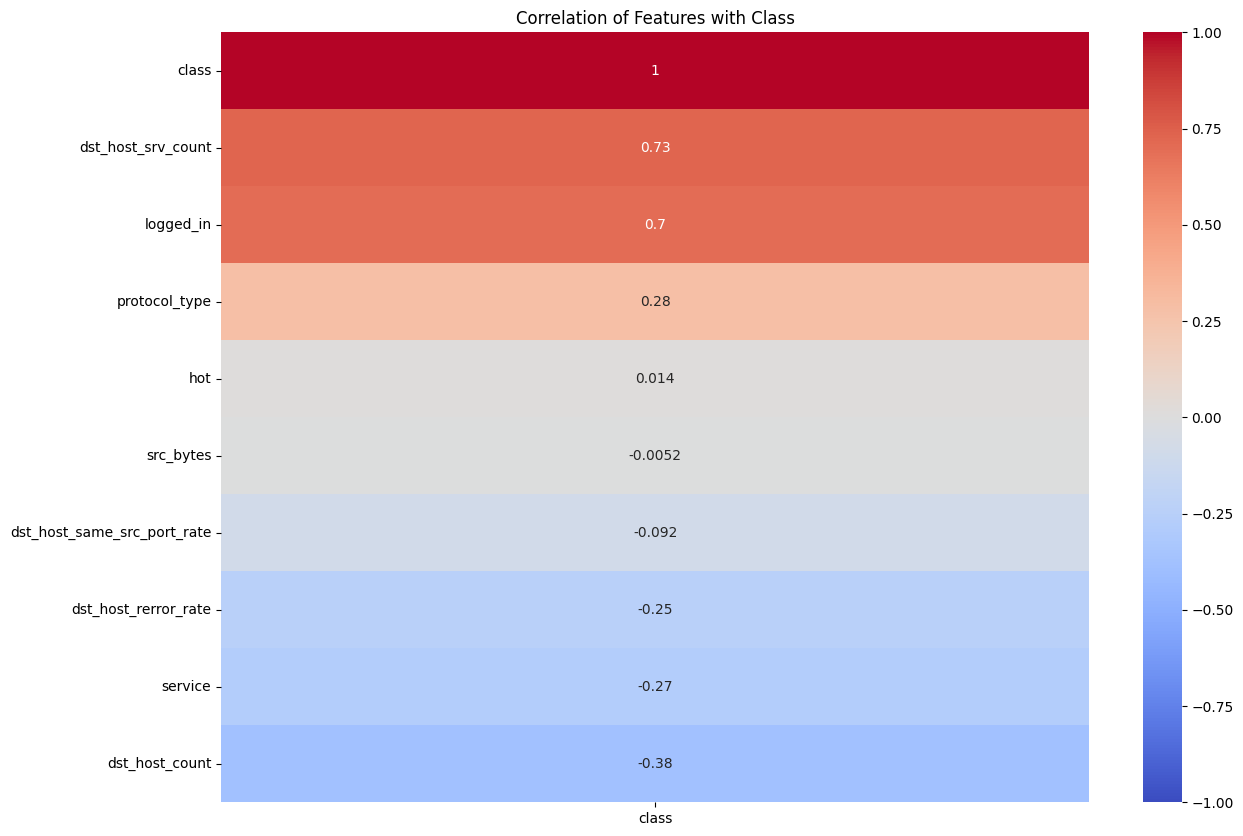

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Compute the correlation matrix for the combined DataFrame
corr_matrix = df_resampled.corr()

# Plot a heatmap of the correlations between each feature and the target 'class'
plt.figure(figsize=(14, 10))
# We sort the features by their correlation with 'class'
sns.heatmap(corr_matrix[['class']].sort_values(by='class', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Class')
plt.show()


In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report


# # 🔹 Initialize XGBoost Classifier
# model = xgb.XGBClassifier(
#     objective="binary:logistic",  # Binary classification
#     eval_metric="logloss",
#     # use_label_encoder=False,
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=6,
#     subsample=0.8,
#     colsample_bytree=0.8
# )

# # 🔹 Train Model
# model.fit(perm_X_reduced, y)

# # 🔹 Make Predictions
# y_pred = model.predict(perm_X_21_reduced)

# # 🔹 Evaluate Performance
# accuracy = accuracy_score(y_21, y_pred)
# print(f"✅ Model Accuracy: {accuracy:.4f}")
# print("\n📊 Classification Report:\n", classification_report(y_21, y_pred))


In [ ]:
# xgb.plot_importance(model)
# plt.show()

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# import numpy as np


# # Define NN Model
# model = keras.Sequential([
#     keras.layers.Dense(64, activation='relu', input_shape=(perm_X_reduced.shape[1],)),  # Input layer
#     keras.layers.Dense(32, activation='relu'),  # Hidden layer
#     keras.layers.Dense(16, activation='relu'),  # Hidden layer
#     keras.layers.Dense(1, activation='sigmoid')  # Output layer (Binary Classification)
# ])

# # Compile Model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train Model
# model.fit(perm_X_reduced, y, epochs=50, batch_size=32, verbose=1)

# # Predict on Test Data
# y_pred_probs = model.predict(perm_X_21_reduced)
# y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to 0/1

# # Evaluate Accuracy
# accuracy = accuracy_score(y_21, y_pred)
# print(f"NN Accuracy: {accuracy:.4f}")

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 🔹 Define Optuna Objective Function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
    }

    # Train Model
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_resampled, y_resampled)

    # Predict on Given Test Data
    y_pred = model.predict(perm_X_21_reduced)

    y_actual_pred = model.predict(perm_x_actual_21_reduced)

    # Evaluate Accuracy
    accuracy = accuracy_score(y_21, y_pred)

    actual_accuracy = accuracy_score(y_actual_21, y_actual_pred)

    # return accuracy  # Return Accuracy Score

    return actual_accuracy



# 🔹 Run Optuna Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 🎯 Best Parameters Found
best_params = study.best_trial.params
print("\n🚀 Best Hyperparameters:", best_params)

# 🔹 Train Final Model with Best Hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_model.fit(X_resampled, y_resampled)

# 🔹 Make Final Predictions
y_pred = best_model.predict(perm_X_21_reduced)
y_actual_pred = best_model.predict(perm_x_actual_21_reduced)

# 🔹 Evaluate Performance
accuracy = accuracy_score(y_21, y_pred)
print(f"\n✅ Optimized Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_21, y_pred))

actual_accuracy = accuracy_score(y_actual_21, y_actual_pred)
print(f"\n✅ Optimized Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_21, y_pred))

In [ ]:
# import optuna
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# import xgboost as xgb
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler

# def optimize_models(X_train, y_train, X_test, y_test, n_trials=100):
#     def objective(trial):
#         # Choose algorithm
#         algorithm = trial.suggest_categorical('algorithm',
#             ['rf', 'xgb', 'knn', 'svm'])

#         if algorithm == 'rf':
#             params = {
#                 'n_estimators': trial.suggest_int('rf_n_estimators', 50, 300),
#                 'max_depth': trial.suggest_int('rf_max_depth', 3, 20),
#                 'min_samples_split': trial.suggest_int('rf_min_samples_split', 2, 10),
#                 'min_samples_leaf': trial.suggest_int('rf_min_samples_leaf', 1, 5)
#             }
#             model = RandomForestClassifier(**params, random_state=42)

#         elif algorithm == 'xgb':
#             params = {
#                 'n_estimators': trial.suggest_int('xgb_n_estimators', 50, 300),
#                 'max_depth': trial.suggest_int('xgb_max_depth', 3, 15),
#                 'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.3),
#                 'subsample': trial.suggest_float('xgb_subsample', 0.5, 1.0),
#                 'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.5, 1.0),
#                 'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 7)
#             }
#             model = xgb.XGBClassifier(**params, random_state=42)


#         elif algorithm == 'knn':
#             params = {
#                 'n_neighbors': trial.suggest_int('knn_n_neighbors', 3, 20),
#                 'weights': trial.suggest_categorical('knn_weights', ['uniform', 'distance']),
#                 'p': trial.suggest_int('knn_p', 1, 2)
#             }
#             model = KNeighborsClassifier(**params)

#         else:  # SVM
#             params = {
#                 'C': trial.suggest_float('svm_C', 1e-3, 100, log=True),
#                 'kernel': trial.suggest_categorical('svm_kernel', ['rbf', 'linear']),
#                 'gamma': trial.suggest_float('svm_gamma', 1e-3, 1, log=True)
#             }
#             model = SVC(**params, random_state=42)

#         # Scale features for KNN, and SVM
#         if algorithm in ['knn', 'svm']:
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_test_scaled = scaler.transform(X_test)
#             model.fit(X_train_scaled, y_train)
#             y_pred = model.predict(X_test_scaled)
#         else:
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)

#         accuracy = accuracy_score(y_test, y_pred)
#         return accuracy

#     study = optuna.create_study(direction='maximize')
#     study.optimize(objective, n_trials=n_trials)

#     print(f"\nBest trial:")
#     print(f"Value: {study.best_value:.4f}")
#     print(f"Params: {study.best_params}")

#     # Return best model fitted on data
#     best_params = study.best_params
#     algorithm = best_params['algorithm']

#     if algorithm == 'rf':
#         params = {k[3:]: v for k, v in best_params.items() if k.startswith('rf_')}
#         best_model = RandomForestClassifier(**params, random_state=42)
#     elif algorithm == 'xgb':
#         params = {k[4:]: v for k, v in best_params.items() if k.startswith('xgb_')}
#         best_model = xgb.XGBClassifier(**params, random_state=42)
#     elif algorithm == 'knn':
#         params = {k[4:]: v for k, v in best_params.items() if k.startswith('knn_')}
#         best_model = KNeighborsClassifier(**params)
#     else:
#         params = {k[4:]: v for k, v in best_params.items() if k.startswith('svm_')}
#         best_model = SVC(**params, random_state=42)

#     if algorithm in ['knn', 'svm']:
#         scaler = StandardScaler()
#         X_train_scaled = scaler.fit_transform(X_train)
#         best_model.fit(X_train_scaled, y_train)
#         return best_model, scaler
#     else:
#         best_model.fit(X_train, y_train)
#         return best_model, None

# # Usage:
# best_model, scaler = optimize_models(X_resampled, y_resampled,
#                                    perm_X_21_reduced, y_21,
#                                    n_trials=100)

In [ ]:
# import optuna
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, classification_report

# # 🔹 Define Optuna Objective Function
# def objective(trial):
#     params = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'logloss',
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'use_label_encoder': False
#     }

#     # Train Model
#     model = xgb.XGBClassifier(**params)
#     model.fit(perm_X_reduced, y)

#     # Predict on Given Test Data
#     y_pred = model.predict(perm_X_21_reduced)

#     # Evaluate Accuracy
#     accuracy = accuracy_score(y_21, y_pred)

#     return accuracy  # Return Accuracy Score

# # 🔹 Run Optuna Optimization
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# # 🎯 Best Parameters Found
# best_params = study.best_trial.params
# print("\n🚀 Best Hyperparameters:", best_params)

# # 🔹 Train Final Model with Best Hyperparameters
# best_model = xgb.XGBClassifier(**best_params)
# best_model.fit(perm_X_reduced, y)

# # 🔹 Make Final Predictions
# y_pred = best_model.predict(perm_X_21_reduced)
# #
# # 🔹 Evaluate Performance
# accuracy = accuracy_score(y_21, y_pred)
# print(f"\n✅ Optimized Model Accuracy: {accuracy:.4f}")
# print("\n📊 Classification Report:\n", classification_report(y_21, y_pred))


In [ ]:
# import optuna
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, classification_report

# # 🔹 Define Optuna Objective Function
# def objective(trial):
#     params = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'logloss',
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'use_label_encoder': False
#     }

#     # Train rf_Model
#     rf_model = xgb.XGBClassifier(**params)
#     rf_model.fit(rf_X_reduced, y)

#     # Predict on Given Test Data
#     y_pred = rf_model.predict(rf_X_21_reduced)

#     # Evaluate Accuracy
#     accuracy = accuracy_score(y_21, y_pred)

#     return accuracy  # Return Accuracy Score

# # 🔹 Run Optuna Optimization
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# # 🎯 Best Parameters Found
# best_params = study.best_trial.params
# print("\n🚀 Best Hyperparameters:", best_params)

# # 🔹 Train Final rf_Model with Best Hyperparameters
# best_rf_model = xgb.XGBClassifier(**best_params)
# best_rf_model.fit(rf_X_reduced, y)

# # 🔹 Make Final Predictions
# y_pred = best_rf_model.predict(rf_X_21_reduced)

# # 🔹 Evaluate Performance
# accuracy = accuracy_score(y_21, y_pred)
# print(f"\n✅ Optimized rf_Model Accuracy: {accuracy:.4f}")
# print("\n📊 Classification Report:\n", classification_report(y_21, y_pred))


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Get probability scores
y_probs = model.predict_proba(perm_X_21_reduced)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_21, y_probs)

# Find best threshold for maximum F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply new threshold
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_21, y_pred_adjusted))


In [ ]:
class1= y_resampled.value_counts()
class1

In [ ]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# 🔹 Define Optuna Objective Function
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'use_label_encoder': False
    }

    # Train Model
    model = xgb.XGBClassifier(**params)
    model.fit(perm_X_reduced, y)

    # Predict on Given Test Data
    y_pred = model.predict(perm_X_21_reduced)

    # Evaluate Accuracy
    accuracy = accuracy_score(y_21, y_pred)

    return accuracy  # Return Accuracy Score

# 🔹 Run Optuna Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 🎯 Best Parameters Found
best_params = study.best_trial.params
print("\n🚀 Best Hyperparameters:", best_params)

# 🔹 Train Final Model with Best Hyperparameters
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_resampled, y_resampled)

# 🔹 Make Final Predictions
y_pred = best_model.predict(perm_X_21_reduced)

# 🔹 Evaluate Performance
accuracy = accuracy_score(y_21, y_pred)
print(f"\n✅ Optimized Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_21, y_pred))


In [ ]:
import optuna
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score


In [ ]:
#[I 2025-02-03 10:22:48,850] Trial 49 finished with value: 0.7901880766501065 and parameters: {'n_estimators': 121, 'learning_rate': 0.11207916799202451, 'num_leaves': 192, 'max_depth': 0, 'min_child_samples': 58, 'subsample': 0.5906734306720637, 'colsample_bytree': 0.8497154897994582, 'reg_alpha': 8.943380134550855, 'reg_lambda': 5.238242505653438}. Best is trial 46 with value: 0.8669712562100781.
